In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./datasets/social_network_ads.csv", index_col='User ID')

In [3]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


In [4]:
df.shape

(400, 4)

In [5]:
df['Purchased'].value_counts() / 400

Purchased
0    0.6425
1    0.3575
Name: count, dtype: float64

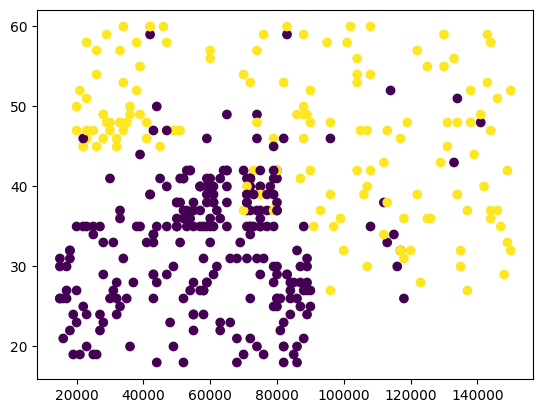

In [6]:
plt.scatter(x=df['EstimatedSalary'], y=df['Age'], c=df['Purchased'])

In [7]:
X = df[['EstimatedSalary', 'Age']].values
y = df['Purchased'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

def plot_depth(X,y,model = DecisionTreeClassifier(max_depth=3)):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    model.fit(X_train, y_train)
    
    print("Accuracy :", np.mean(cross_val_score(model, X, y, cv=10, scoring='accuracy')))
    print("f1 score :", np.mean(cross_val_score(model, X, y, cv=10, scoring='f1')))
    
    plot_decision_regions(X_test, y_test, model)
    

Accuracy : 0.875
f1 score : 0.8050483895867657


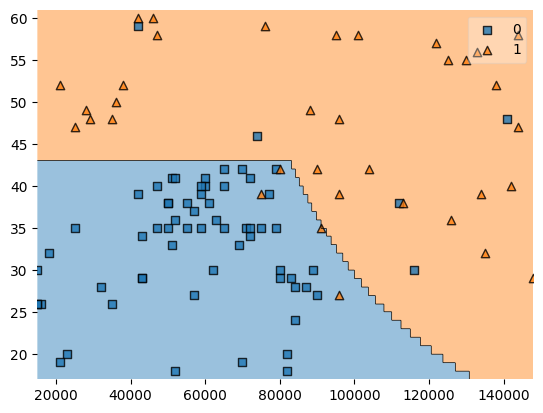

In [10]:
dt = DecisionTreeClassifier(max_depth=3, splitter='best')
dt_pipe = Pipeline([
    ("polynomial feature", PolynomialFeatures(degree=3)),
    ("decision tree", dt)
])
plot_depth(X, y, dt_pipe)

Accuracy : 0.85
f1 score : 0.7712563341984922


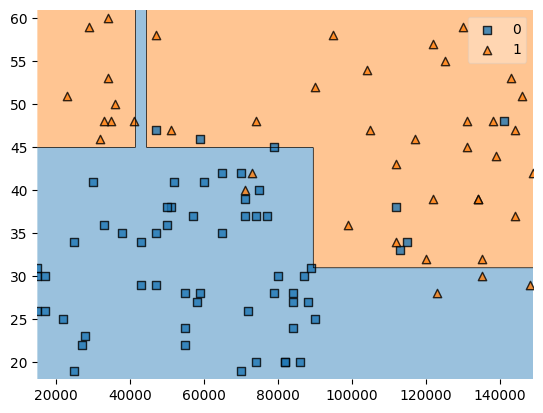

In [11]:
dt = DecisionTreeClassifier(max_depth=3)
plot_depth(X, y, dt)

Accuracy : 0.3575
f1 score : 0.5265993265993265


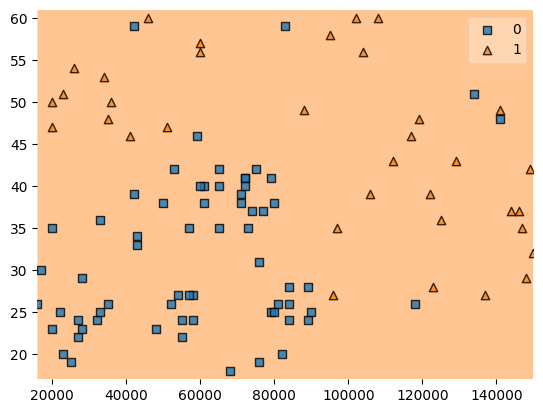

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_pipe = Pipeline([
    ("polynomial feature", PolynomialFeatures(degree=3)),
    ("logistic regression", lr)
])

plot_depth(X, y, lr_pipe)